In [1]:
import rishi_utils as ru
from rdkit import Chem
import fall20_mse_8803 as retro
import importlib
importlib.reload(retro)
importlib.reload(ru)
import numpy as np

# Test is_symmetric2

In [ ]:
Chem.Atom.GetProp

In [5]:
m.GetAtoms()[0].GetPropsAsDict()

{'__computedProps': <rdkit.rdBase._vectNSt7__cxx1112basic_stringIcSt11char_traitsIcESaIcEEE at 0x7f8972e491b0>,
 '_CIPRank': 16,
 '_GasteigerCharge': -0.04416729327207542,
 '_GasteigerHCharge': 0.0637734946058738}

In [6]:
m.GetAtoms()[0].GetProp('_GasteigerCharge')

'-0.044167293272075421'

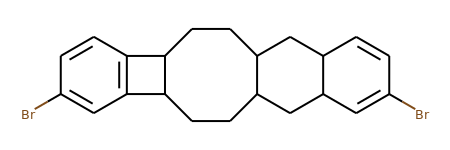

In [2]:
m = Chem.MolFromSmiles('C1=C(C=CC2=C1C3C2CCC4C(CC3)CC5C(C4)C=CC(=C5)Br)Br')
m

In [20]:
retro.is_symmetric2(m,'Br')

False

In [18]:
retro.is_symmetric2('C=C','C')

True

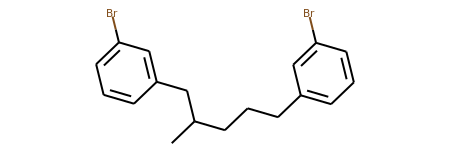

In [2]:
m2 = Chem.MolFromSmiles('C(C(CCCC1=CC=CC(=C1)Br)C)C2=CC(=CC=C2)Br')
m2

In [24]:
retro.is_symmetric2(m2,'Br')

False

In [6]:
retro.is_symmetric2(m2,'Br')

False

# ox_depolymerize scratch

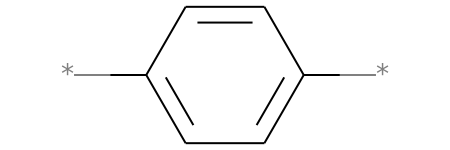

In [65]:
mol = Chem.MolFromSmiles('*c1ccc(*)cc1')
mol

In [66]:
mol.GetAtoms()[2].GetBonds()[0].GetBondTypeAsDouble()

1.5

In [67]:
lp = ru.LinearPol(mol)
if retro.is_symmetric2(lp.mol,'*'):
    bonds = lp.mol.GetAtoms()[max(lp.connector_inds)].GetBonds()
    bond_types = np.array([b.GetBondTypeAsDouble() for b in bonds])
    if any(bond_types > 1):
        em = Chem.EditableMol(lp.mol)
        em.RemoveAtom(max(lp.star_inds))
        em.RemoveAtom(min(lp.star_inds))
        try:
            new_mol = em.GetMol()
            Chem.SanitizeMol(new_mol)
            #return new_mol
        except:
            print(None)
            #return None
    else:
        print(None)
        #return None
else:
    print(None)
    #return None

In [68]:
Chem.SanitizeMol(new_mol)

rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_NONE

In [69]:
mol.GetBonds()[6].GetBondTypeAsDouble()

1.5

In [70]:
mol.GetBonds()[6].GetBondType()

rdkit.Chem.rdchem.BondType.AROMATIC

# Test ox_depolymerize

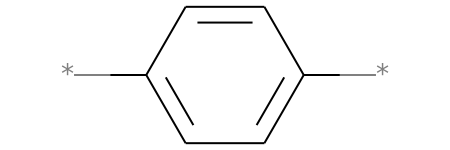

In [98]:
mol = Chem.MolFromSmiles('*c1ccc(*)cc1')
mol

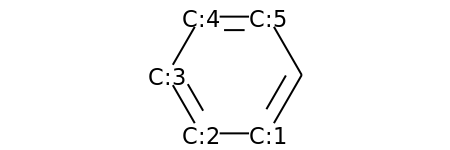

In [99]:
retro.ox_depolymerize(mol)

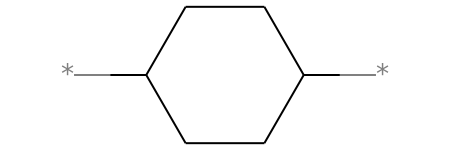

In [100]:
mol = Chem.MolFromSmiles('*C1CCC(*)CC1')
mol

In [101]:
retro.ox_depolymerize(mol) #should return nothing. No double bonds

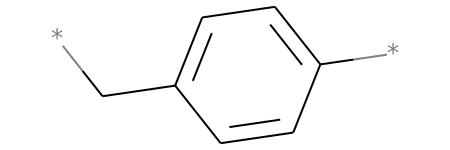

In [102]:
mol3 = Chem.MolFromSmiles('*Cc1ccc(*)cc1')
mol3

In [103]:
retro.ox_depolymerize(mol3) #should return nothing. Not symmetric

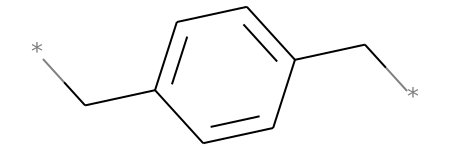

In [104]:
mol4 = Chem.MolFromSmiles('*Cc1ccc(C*)cc1')
mol4

In [105]:
retro.ox_depolymerize(mol4) #should return nothing. Connector atoms do not have pi electrons

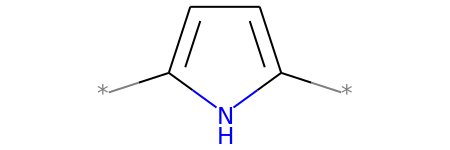

In [7]:
mol5 = Chem.MolFromSmiles('*c1ccc(*)[nH]1')
mol5

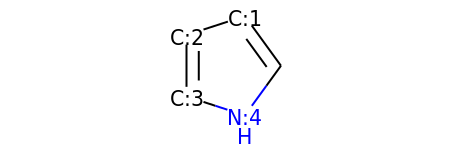

In [8]:
retro.ox_depolymerize(mol5) #should return something

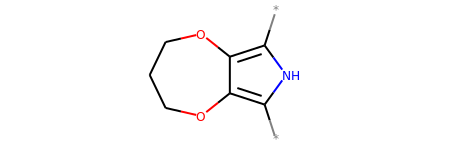

In [2]:
mol6 = Chem.MolFromSmiles('*c1[nH]c(*)c2OCCCOc12')
mol6

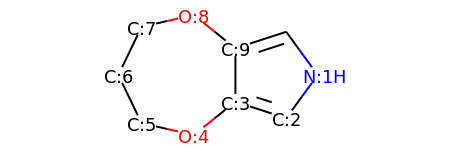

In [3]:
retro.ox_depolymerize(mol6) #shoudld return something

# Look thru G2G polymers

In [2]:
success = ru.pd_load('/data/rgur/g2g/paper_1/cib_tg_eg/cutoff-.1/first_cib_model/new_polymers_12_43PM_on_June_23_2020_sortedObjective.csv')
success.head()

len(success)

smiles_ls = success['SMILES'].tolist()
inds = [x for x in smiles_ls if retro.ox_depolymerize(x) != None]
inds

len(inds)

0

# Check symmetry

In [21]:
inds = []
for x in smiles_ls:
    lp = ru.LinearPol(x)
    if len(set(lp.connector_inds)) == 2:
        m=lp.delStarMol()
        if retro.is_symmetric2(m,group=lp.delStarMolInds):
            inds += [x]

In [22]:
len(inds)

51

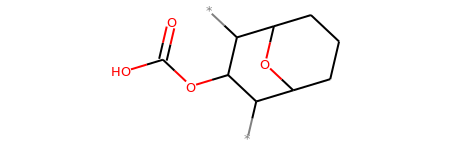

In [23]:
Chem.MolFromSmiles(inds[0])

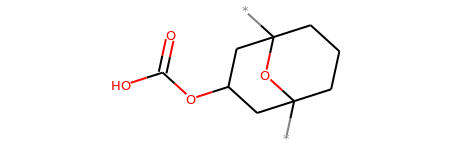

In [25]:
Chem.MolFromSmiles(inds[1])

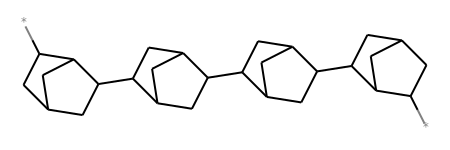

In [26]:
Chem.MolFromSmiles(inds[2])

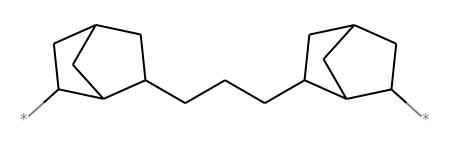

In [27]:
Chem.MolFromSmiles(inds[3])

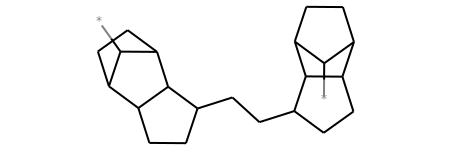

In [28]:
Chem.MolFromSmiles(inds[4])

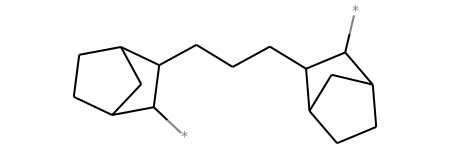

In [29]:
Chem.MolFromSmiles(inds[5])

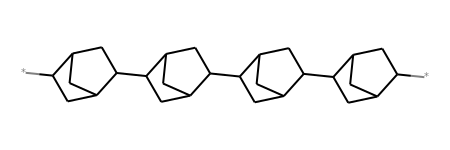

In [30]:
Chem.MolFromSmiles(inds[6])

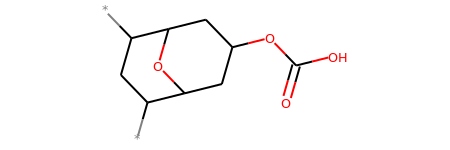

In [31]:
Chem.MolFromSmiles(inds[7])

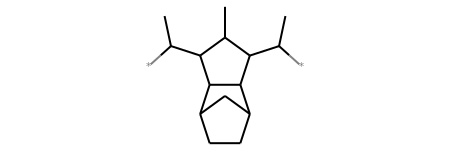

In [32]:
Chem.MolFromSmiles(inds[8])

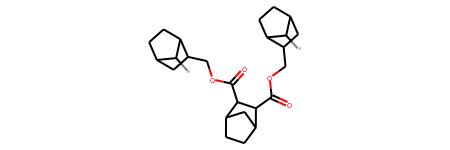

In [33]:
Chem.MolFromSmiles(inds[9])

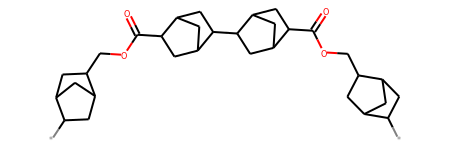

In [34]:
Chem.MolFromSmiles(inds[10])

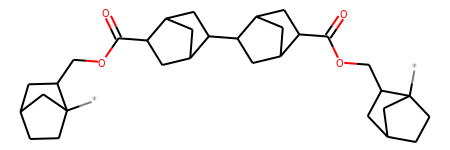

In [35]:
Chem.MolFromSmiles(inds[11])

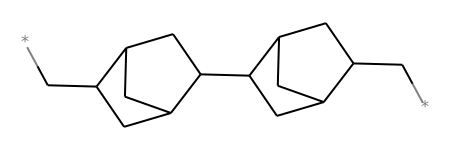

In [36]:
Chem.MolFromSmiles(inds[12])

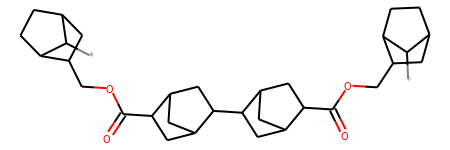

In [37]:
Chem.MolFromSmiles(inds[13])

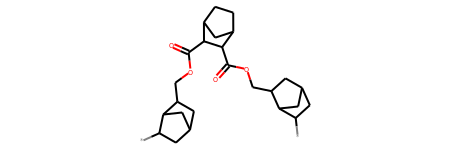

In [38]:
Chem.MolFromSmiles(inds[14])

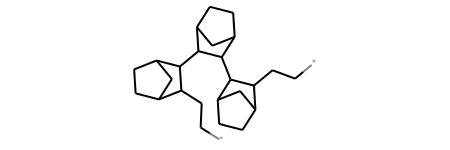

In [39]:
Chem.MolFromSmiles(inds[15])

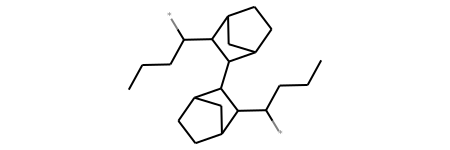

In [40]:
Chem.MolFromSmiles(inds[16])

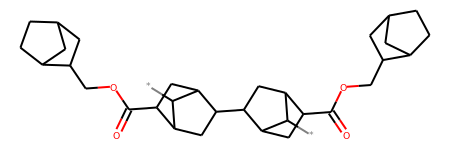

In [41]:
Chem.MolFromSmiles(inds[17])

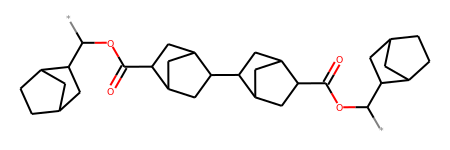

In [42]:
Chem.MolFromSmiles(inds[18])

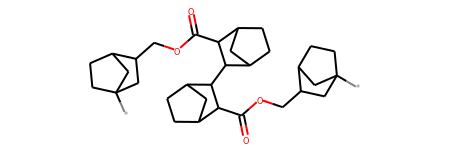

In [43]:
Chem.MolFromSmiles(inds[19])

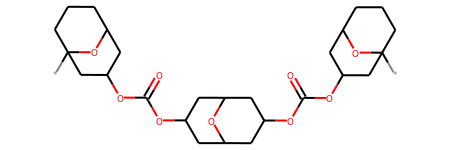

In [44]:
Chem.MolFromSmiles(inds[20])

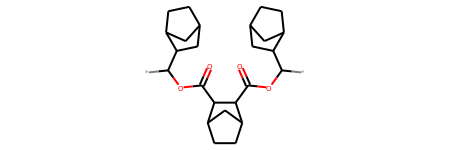

In [45]:
Chem.MolFromSmiles(inds[21])

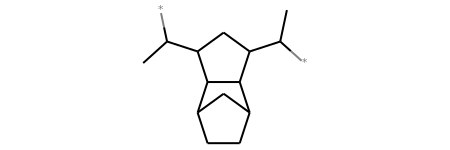

In [46]:
Chem.MolFromSmiles(inds[22])

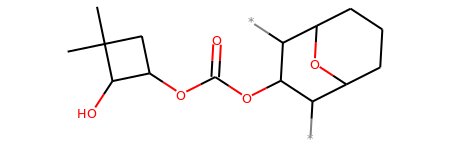

In [47]:
Chem.MolFromSmiles(inds[23])

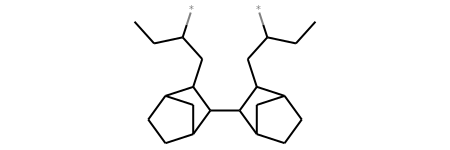

In [48]:
Chem.MolFromSmiles(inds[24])

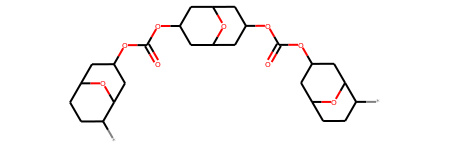

In [49]:
Chem.MolFromSmiles(inds[25])

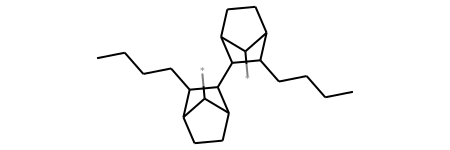

In [50]:
Chem.MolFromSmiles(inds[26])

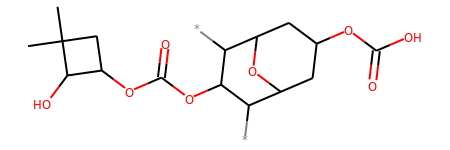

In [51]:
Chem.MolFromSmiles(inds[27])

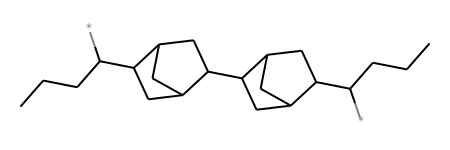

In [52]:
Chem.MolFromSmiles(inds[28])

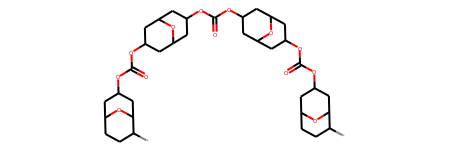

In [53]:
Chem.MolFromSmiles(inds[29])

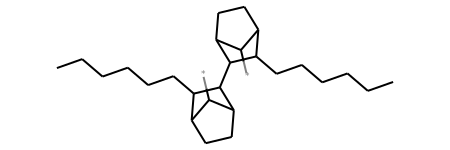

In [54]:
Chem.MolFromSmiles(inds[40])

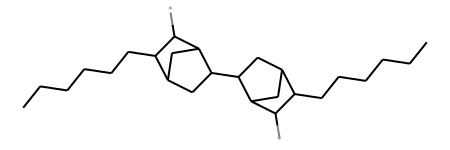

In [55]:
Chem.MolFromSmiles(inds[47])

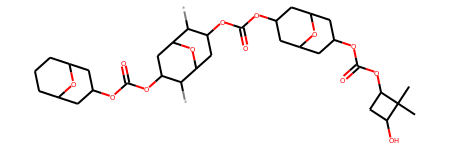

In [56]:
Chem.MolFromSmiles(inds[50])

# Look for resonance

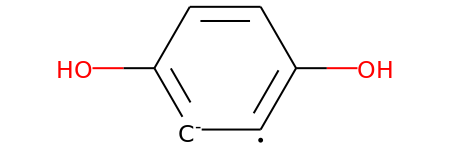

In [15]:
mol = Chem.MolFromSmiles('Oc1[c][c-]c(O)cc1')
mol

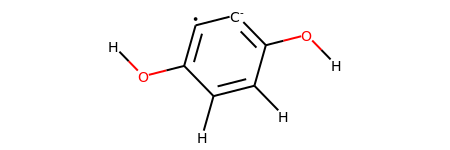

In [16]:
Chem.AddHs(mol)

In [17]:
a=Chem.ResonanceMolSupplier(mol)

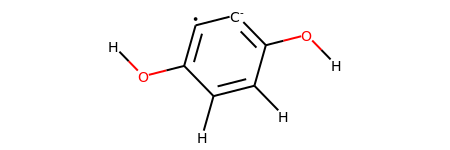

In [18]:
Chem.AddHs(a[0])

In [19]:
Chem.AddHs(a[1])

ArgumentError: Python argument types in
    rdkit.Chem.rdmolops.AddHs(NoneType)
did not match C++ signature:
    AddHs(RDKit::ROMol mol, bool explicitOnly=False, bool addCoords=False, boost::python::api::object onlyOnAtoms=None, bool addResidueInfo=False)

In [20]:
Chem.AddHs(a[2])

ArgumentError: Python argument types in
    rdkit.Chem.rdmolops.AddHs(NoneType)
did not match C++ signature:
    AddHs(RDKit::ROMol mol, bool explicitOnly=False, bool addCoords=False, boost::python::api::object onlyOnAtoms=None, bool addResidueInfo=False)